In [1]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 

import SD_raster_loading
import SD_NC_loading
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv
import seaborn as sns
import scipy as sp
from datetime import timedelta
import matplotlib.dates as mdates

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV

In [54]:
coord = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
S2_df = SD_NC_loading.load_multiple_SDs('S2_downloads/acolite_output/',
                                        coord, skipSameDay=False,
                                        pixel_grid_shape=(2,2),
                                        filetype="L2W.nc",
                                        variable='Rrs',
                                        div_by_pi=False,)

date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 f

In [55]:
S2_df

rho_s_20_29   rho_s_20_30  \
Date                             Wavelength                               
2022-03-01 11:45:32.611188+00:00 442.0       0.0012422785  0.0012422785   
                                 492.0       0.0009703435  0.0009703435   
                                 559.0       0.0024076502  0.0020480545   
                                 665.0       0.0006742244  0.0006742244   
                                 704.0       0.0023193755  0.0022398906   
...                                                   ...           ...   
2023-10-29 11:35:41.339229+00:00 780.0                nan           nan   
                                 833.0                nan           nan   
                                 864.0                nan           nan   
                                 1610.0               nan           nan   
                                 2186.0               nan           nan   

                                               rho_s_21_29    rho_s_21_30  
Date                             Wavelength                                
2022-03-01 11:45:32.611188+00:00 442.0        0.0012422785   0.0012422785  
                                 492.0        0.0015178726   0.0005138426  
                                 559.0        0.0018682191   0.0011486395  
                                 665.0       0.00019546489  0.00051465107  
                                 704.0        0.0018424245   0.0021604036  
...                                                    ...            ...  
2023-10-29 11:35:41.339229+00:00 780.0                 nan            nan  
                                 833.0                 nan            nan  
                                 864.0                 nan            nan  
                                 1610.0                nan            nan  
                                 2186.0                nan            nan  

[1221 rows x 4 columns]

In [56]:
S2_ = S2_df.reset_index()
S2_['date'] = S2_.Date.dt.date

In [57]:
S2_

,Date,Wavelength,rho_s_20_29,rho_s_20_30,rho_s_21_29,rho_s_21_30,date
0,2022-03-01 11:45:32.611188+00:00,442.0,0.0012422785,0.0012422785,0.0012422785,0.0012422785,2022-03-01
1,2022-03-01 11:45:32.611188+00:00,492.0,0.0009703435,0.0009703435,0.0015178726,0.0005138426,2022-03-01
2,2022-03-01 11:45:32.611188+00:00,559.0,0.0024076502,0.0020480545,0.0018682191,0.0011486395,2022-03-01
3,2022-03-01 11:45:32.611188+00:00,665.0,0.0006742244,0.0006742244,0.00019546489,0.00051465107,2022-03-01
4,2022-03-01 11:45:32.611188+00:00,704.0,0.0023193755,0.0022398906,0.0018424245,0.0021604036,2022-03-01
...,...,...,...,...,...,...,...
1216,2023-10-29 11:35:41.339229+00:00,780.0,nan,nan,nan,nan,2023-10-29
1217,2023-10-29 11:35:41.339229+00:00,833.0,nan,nan,nan,nan,2023-10-29
1218,2023-10-29 11:35:41.339229+00:00,864.0,nan,nan,nan,nan,2023-10-29
1219,2023-10-29 11:35:41.339229+00:00,1610.0,nan,nan,nan,nan,2023-10-29


In [58]:
S2_melt = pd.melt(S2_, id_vars=['Date', 'date', 'Wavelength'],
                   var_name='location', value_name='Rrs')

In [59]:
S2_melt

,Date,date,Wavelength,location,Rrs
0,2022-03-01 11:45:32.611188+00:00,2022-03-01,442.0,rho_s_20_29,0.0012422785
1,2022-03-01 11:45:32.611188+00:00,2022-03-01,492.0,rho_s_20_29,0.0009703435
2,2022-03-01 11:45:32.611188+00:00,2022-03-01,559.0,rho_s_20_29,0.0024076502
3,2022-03-01 11:45:32.611188+00:00,2022-03-01,665.0,rho_s_20_29,0.0006742244
4,2022-03-01 11:45:32.611188+00:00,2022-03-01,704.0,rho_s_20_29,0.0023193755
...,...,...,...,...,...
4879,2023-10-29 11:35:41.339229+00:00,2023-10-29,780.0,rho_s_21_30,nan
4880,2023-10-29 11:35:41.339229+00:00,2023-10-29,833.0,rho_s_21_30,nan
4881,2023-10-29 11:35:41.339229+00:00,2023-10-29,864.0,rho_s_21_30,nan
4882,2023-10-29 11:35:41.339229+00:00,2023-10-29,1610.0,rho_s_21_30,nan


In [60]:
s2_med = S2_melt.drop(['location'], axis=1).groupby(['Date', 'date', 'Wavelength']).median()
s2_med.rename(columns={'Rrs':'Rrs_S2'}, inplace=True)
s2_med = s2_med.reset_index()
s2_med.date.unique()

array([datetime.date(2022, 3, 1), datetime.date(2022, 3, 6),
       datetime.date(2022, 3, 8), datetime.date(2022, 3, 21),
       datetime.date(2022, 3, 23), datetime.date(2022, 3, 26),
       datetime.date(2022, 3, 28), datetime.date(2022, 3, 31),
       datetime.date(2022, 4, 20), datetime.date(2022, 4, 22),
       datetime.date(2022, 4, 27), datetime.date(2022, 5, 25),
       datetime.date(2022, 5, 27), datetime.date(2022, 6, 4),
       datetime.date(2022, 7, 1), datetime.date(2022, 7, 4),
       datetime.date(2022, 7, 14), datetime.date(2022, 7, 16),
       datetime.date(2022, 7, 29), datetime.date(2022, 8, 5),
       datetime.date(2022, 8, 10), datetime.date(2022, 8, 13),
       datetime.date(2022, 8, 20), datetime.date(2022, 8, 28),
       datetime.date(2022, 9, 12), datetime.date(2022, 9, 14),
       datetime.date(2022, 9, 19), datetime.date(2022, 9, 24),
       datetime.date(2022, 9, 27), datetime.date(2022, 9, 29),
       datetime.date(2022, 10, 7), datetime.date(2022, 10, 12)

In [61]:
s2_med.dropna().date.unique()

array([datetime.date(2022, 3, 1), datetime.date(2022, 3, 6),
       datetime.date(2022, 3, 8), datetime.date(2022, 3, 21),
       datetime.date(2022, 3, 23), datetime.date(2022, 3, 26),
       datetime.date(2022, 3, 28), datetime.date(2022, 4, 20),
       datetime.date(2022, 4, 22), datetime.date(2022, 5, 25),
       datetime.date(2022, 5, 27), datetime.date(2022, 6, 4),
       datetime.date(2022, 7, 1), datetime.date(2022, 7, 4),
       datetime.date(2022, 7, 14), datetime.date(2022, 7, 16),
       datetime.date(2022, 7, 29), datetime.date(2022, 8, 10),
       datetime.date(2022, 8, 20), datetime.date(2022, 9, 12),
       datetime.date(2022, 9, 14), datetime.date(2022, 9, 24),
       datetime.date(2023, 3, 1), datetime.date(2023, 3, 6),
       datetime.date(2023, 3, 8), datetime.date(2023, 3, 11),
       datetime.date(2023, 4, 7), datetime.date(2023, 4, 15),
       datetime.date(2023, 4, 20), datetime.date(2023, 5, 15),
       datetime.date(2023, 5, 25), datetime.date(2023, 5, 30),
  

In [62]:
dalec_df = pd.read_csv('DALEC_S2_bands_2022_23.csv')
dalec_df.drop(['Unnamed: 0', 'month', 'year', 'Date'], axis=1, inplace=True)
dalec_df.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_df

,Rrs_DALEC,Wavelength,date
0,0.003053,443.0,2022-07-28
1,0.004561,490.0,2022-07-28
2,0.008125,560.0,2022-07-28
3,0.004735,665.0,2022-07-28
4,0.006756,705.0,2022-07-28
...,...,...,...
61602,0.002805,865.0,2023-09-30
61603,0.022332,945.0,2023-09-30
61604,NaN,1375.0,2023-09-30
61605,NaN,1610.0,2023-09-30


In [63]:
dalec_med = dalec_df.groupby(['Wavelength', 'date']).median().reset_index()
dalec_med

,Wavelength,date,Rrs_DALEC
0,443.0,2022-07-28,0.003411
1,443.0,2022-07-31,0.003916
2,443.0,2022-08-01,0.003722
3,443.0,2022-08-02,0.003529
4,443.0,2022-08-03,0.002912
...,...,...,...
1243,2190.0,2023-09-26,NaN
1244,2190.0,2023-09-27,NaN
1245,2190.0,2023-09-28,NaN
1246,2190.0,2023-09-29,NaN


In [64]:
def nearest_wavelength(w_in, w_list):
    diff = np.abs(w_list - w_in)
    return w_list[np.argmin(diff)]
def square(x, power):
    return x**power

In [65]:
# convert S2 wavelengths to DALEC wavelengths
# this is needed because S2A and B have different wavelength grids
# need to have a think about whether I should do this in a more thorough way..
s2_med['Wavelength'] = s2_med.Wavelength.apply(nearest_wavelength,
                                               args=[dalec_df.Wavelength.unique()])

In [66]:
s2_med['Wavelength'].unique()

array([ 443.,  490.,  560.,  665.,  705.,  740.,  783.,  842.,  865.,
       1610., 2190.])

In [67]:
dalec_med['date'] = pd.to_datetime(dalec_med.date)
s2_med['date'] = pd.to_datetime(s2_med.date)
dalec_s2 = dalec_med.merge(s2_med, on=['date', 'Wavelength'], how='left').dropna()
dalec_s2

,Wavelength,date,Rrs_DALEC,Date,Rrs_S2
10,443.0,2022-08-10,0.004042,2022-08-10 11:35:51.356894+00:00,0.000393
17,443.0,2023-07-09,0.000226,2023-07-09 11:45:41.249512+00:00,0.00893
24,443.0,2023-07-16,0.001330,2023-07-16 11:35:44.169426+00:00,0.071764
27,443.0,2023-07-19,0.000320,2023-07-19 11:45:40.094481+00:00,0.014316
37,443.0,2023-07-29,0.000241,2023-07-29 11:45:41.220752+00:00,0.016261
...,...,...,...,...,...
815,865.0,2023-08-08,0.001983,2023-08-08 11:45:40.340448+00:00,0.010596
834,865.0,2023-08-28,0.002710,2023-08-28 11:45:41.668952+00:00,0.072379
840,865.0,2023-09-07,0.002839,2023-09-07 11:45:41.283264+00:00,0.020222
845,865.0,2023-09-12,0.000952,2023-09-12 11:45:39.402233+00:00,0.038146


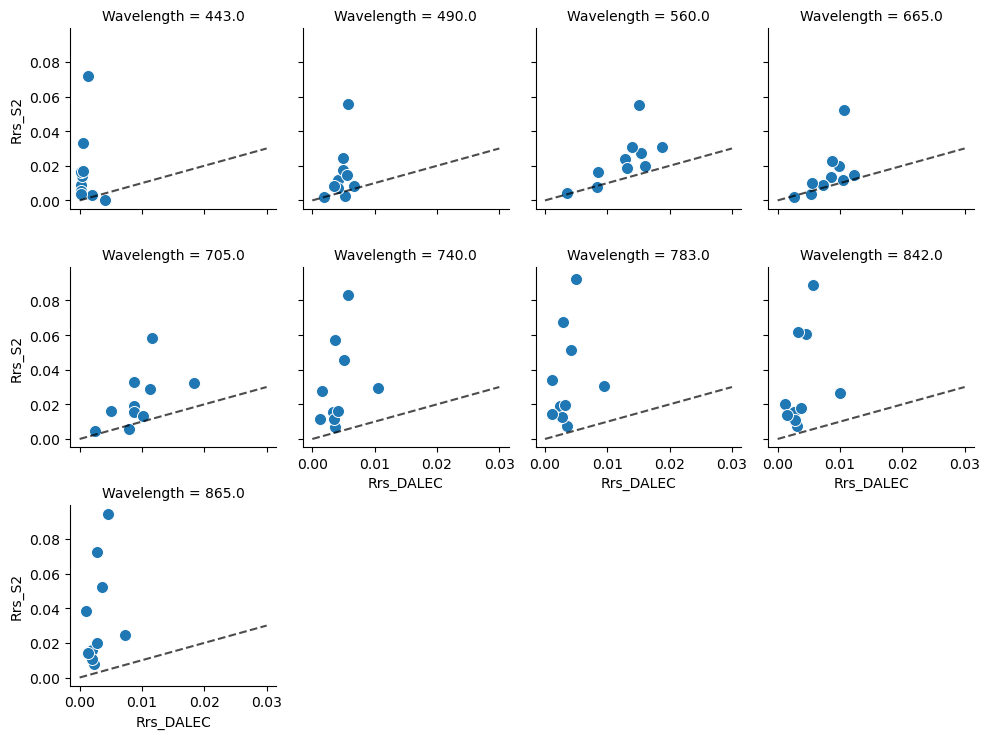

In [70]:
g = sns.FacetGrid(dalec_s2, col='Wavelength', col_wrap=4, height=2.5)
#g.map_dataframe(sns.regplot, x='Rrs_DALEC', y='Rrs_sd')

#g = sns.lmplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength',
#               col_wrap=4, order=1, fit_reg=False, height=3)
#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))

# g.set(ylim=(0, 0.03), xlim=(0, 0.03))

g.map_dataframe(sns.scatterplot, x='Rrs_DALEC', y='Rrs_S2',
                #style='Sat_ID',
                #hue='year',
                legend=True,
                #style='date',
                s=75)

for ax in g.axes.flat:
    ax.plot([0, 0.03], [0, 0.03], 'k--', alpha=0.7)
    
def annotate(data, **kws):
    res = sp.stats.linregress(np.log(data['Rrs_DALEC']), np.log(data['Rrs_sd']))
    #res = sp.stats.linregress((data['Rrs_DALEC']), (data['Rrs_sd']))

    ax = plt.gca()
    ax.text(0.3, 0.1, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    x_vals = np.linspace(0.0001, 0.03, 40)
    ax.plot(x_vals,
            np.exp(res.intercept + res.slope*np.log(x_vals)))
             
    ax.text(0.05, 0.85, 'ln(y) = {:.3f}ln(x) + {:.3f}'.format(res.slope, res.intercept),
            transform=ax.transAxes)
    
#    y_fit = data['Rrs_DALEC']*res.slope + res.intercept
#     MAE = np.sum(np.abs(y_fit - data['Rrs_DALEC']))/len(data['Rrs_DALEC'])
#     ax.text(0.05, 0.8, 'MAE={:.2g}'.format(MAE),
#             transform=ax.transAxes)
    
#g.map_dataframe(annotate)

# g.set(xscale="log")
# g.set(yscale="log")

#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))


plt.tight_layout()
#plt.gca().legend()

plt.show()




In [139]:
def chla_NIR_rat(df, Rrs_708='Rrs_708', Rrs_666='Rrs_666'):
    '''
    just use NIR ratio 708/666 with no coefficients
    '''
    ratio = df[Rrs_708] / df[Rrs_666]
    return ratio

def chla_NDCI(df, Rrs_708='Rrs_708', Rrs_666='Rrs_666'):
    '''
    use NCDI NIR ratio (708-666)/(708+666)
    '''
    ratio = (df[Rrs_708] - df[Rrs_666]) / (df[Rrs_708] + df[Rrs_666])
    return ratio

def chla_OC4(df, Rrs_444='Rrs_444', Rrs_492='Rrs_492',
             Rrs_533='Rrs_533', Rrs_566='Rrs_566',
             a=0.3255, b=-2.7677,
             c=2.4409, d=-1.1288, e=-0.4990, returnX=False):
    '''4 band NASA alg (model L in claire neil paper)'''
    X = np.log10(np.array(np.max([df[Rrs_444], df[Rrs_492], df[Rrs_533]], axis=0)/df[Rrs_566], dtype=float))
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))

def chla_OC4_mod(df, Rrs_444='Rrs_444', Rrs_492='Rrs_492',
             Rrs_533='Rrs_533', Rrs_566='Rrs_566',
             a=0.3255, b=-2.7677,
             c=2.4409, d=-1.1288, e=-0.4990, returnX=False):
    '''4 band NASA alg (model L in claire neil paper)
    with Rrs_444 removed as we cant trust this one... '''
    X = np.log10(np.array(np.max([df[Rrs_492], df[Rrs_533]], axis=0)/df[Rrs_566], dtype=float))
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
    
def chla_OC3(df, Rrs_444='Rrs_444', Rrs_492='Rrs_492',
             Rrs_533='Rrs_533', Rrs_566='Rrs_566',
             a=0.2424, b=-2.2146,
             c=1.5193, d=-0.7702,
             e=-0.4291, returnX=False):
    '''3 band NASA alg (model M in claire neil paper)'''
    X = np.log10(np.array(np.max([df[Rrs_444],
                                  df[Rrs_492]],
                                 axis=0)/(df[Rrs_566]), dtype=float))
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
                
def chla_OC2(df, Rrs_444='Rrs_444', Rrs_492='Rrs_492',
             Rrs_533='Rrs_533', Rrs_566='Rrs_566',
             a=0.2389, b=-1.9369,
             c=1.7627, d=-3.0777,
             e=-0.1054, returnX=False):
    '''2 band NASA alg (model N in claire neil paper)'''
    X = np.log10(np.array(df[Rrs_492]/df[Rrs_566], dtype=float))
    if returnX:
        return X
    else:
        return 10**(a + b*X + c*(X**2) + d*(X**3) + e*(X**4))
    
def chla_RBD(df, Rrs_708='Rrs_708', Rrs_666='Rrs_666'):
    '''
    NIR/red band difference
    '''
    return df[Rrs_708] - df[Rrs_666]

def chla_RBR3(df, Rrs_708='Rrs_708', Rrs_666='Rrs_666', Rrs_866='Rrs_866'):
    return (df[Rrs_666]**-1 - df[Rrs_708]**-1) * df[Rrs_866]



In [140]:
s2_dict = {'Date':s2_med[s2_med.Wavelength==443.0].reset_index().Date,
           'date':s2_med[s2_med.Wavelength==443.0].reset_index().date}
dalec_dict = {'date':dalec_med[dalec_med.Wavelength==443.0].reset_index().date}

for wavelength in s2_med.Wavelength.unique():
    s2_dict['Rrs_'+str(int(wavelength))] = s2_med[s2_med.Wavelength==wavelength].reset_index().Rrs_S2
    dalec_dict['Rrs_'+str(int(wavelength))] = dalec_med[dalec_med.Wavelength==wavelength].reset_index().Rrs_DALEC
    
s2_chla = pd.DataFrame(data=s2_dict)
dalec_chla = pd.DataFrame(data=dalec_dict)


In [150]:
s2_chla.dropna(inplace=True)
s2_chla.reset_index(inplace=True)

In [151]:
# sentinel 2

s2_chla['NIR'] = chla_NIR_rat(s2_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
s2_chla['NDCI'] = chla_NDCI(s2_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
s2_chla['RBD'] = chla_RBD(s2_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
s2_chla['RBR3'] = chla_RBR3(s2_chla, Rrs_708='Rrs_705',
                            Rrs_666='Rrs_665', Rrs_866='Rrs_865')


s2_chla['OC3_X'] = chla_OC3(s2_chla, returnX=True,
                            Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                            Rrs_566='Rrs_560',)
s2_chla['OC2_X'] = chla_OC2(s2_chla, returnX=True,
                            Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                            Rrs_566='Rrs_560',)


s2_chla['OC3'] = chla_OC3(s2_chla,
                          Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                          Rrs_566='Rrs_560',)
s2_chla['OC2'] = chla_OC2(s2_chla,
                          Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                          Rrs_566='Rrs_560',)

# dalec

dalec_chla['NIR'] = chla_NIR_rat(dalec_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
dalec_chla['NDCI'] = chla_NDCI(dalec_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
dalec_chla['RBD'] = chla_RBD(dalec_chla, Rrs_708='Rrs_705', Rrs_666='Rrs_665')
dalec_chla['RBR3'] = chla_RBR3(dalec_chla, Rrs_708='Rrs_705',
                               Rrs_666='Rrs_665', Rrs_866='Rrs_865')

dalec_chla['OC3_X'] = chla_OC3(dalec_chla, returnX=True,
                               Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                               Rrs_566='Rrs_560',)
dalec_chla['OC2_X'] = chla_OC2(dalec_chla, returnX=True, 
                               Rrs_444='Rrs_443', Rrs_492='Rrs_490',
                               Rrs_566='Rrs_560',)

dalec_chla['OC3'] = chla_OC3(dalec_chla, Rrs_444='Rrs_443',
                             Rrs_492='Rrs_490',
                             Rrs_566='Rrs_560',)
dalec_chla['OC2'] = chla_OC2(dalec_chla, Rrs_444='Rrs_443',
                             Rrs_492='Rrs_490',
                             Rrs_566='Rrs_560',)


<Axes: xlabel='Date'>

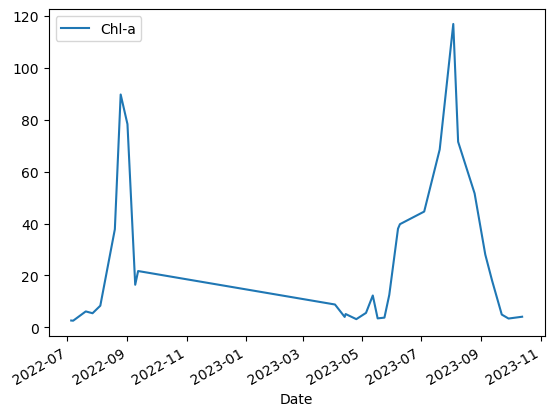

In [152]:
insitu_chl = pd.read_csv('data/chl-a/airthrey_chl.csv')
insitu_chl.Date = pd.to_datetime(insitu_chl.Date, dayfirst=True)
insitu_chl.plot(x='Date', y='Chl-a')

In [154]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 


for alg in ['OC3_X', 'OC2_X',
            'OC3', 'OC2', 'NIR', 'NDCI', 'RBD', 'RBR3']:
    selected_dates = []
    date_diffs = []
    selected_chl = []
    for s2_date in insitu_chl.Date:
        date_deltas = []
        for ins_date in s2_chla.date:
            #print(ins_date)
            date_deltas.append(s2_date - ins_date)
        date_deltas = np.array(np.abs(date_deltas))
        min_ind = np.where(date_deltas==date_deltas.min())
        #print(min_ind)
        selected_dates.append(s2_chla.date[min_ind[0][0]])
        date_diffs.append(date_deltas[min_ind[0][0]])
        selected_chl.append(s2_chla[alg][min_ind[0][0]])
    

    insitu_chl[alg] =  selected_chl
    insitu_chl['s2_date'] = selected_dates
    insitu_chl['s2_date_diff'] = date_diffs

In [161]:
insit_reduced = insitu_chl.loc[insitu_chl.groupby('s2_date').s2_date_diff.idxmin()]
insit_reduced = insit_reduced[insit_reduced.s2_date_diff<'5d']
insit_reduced #= sd_reduced[sd_reduced.date.dt.year==2023]
insit_reduced['year'] = insit_reduced.Date.dt.year
insit_reduced

,Date,Chl-a,OC3_X,s2_date,s2_date_diff,OC2_X,OC3,OC2,NIR,NDCI,RBD,RBR3,year
0,2022-07-05,2.663,-0.066019,2022-07-04,1 days,-0.182208,2.485661,4.664897,1.596994,0.229879,0.008061,1.262221,2022
2,2022-07-20,6.163,-0.282264,2022-07-16,4 days,-0.466431,10.072737,68.098914,1.855259,0.299538,0.003914,2.032481,2022
3,2022-07-27,5.465,-0.265280,2022-07-29,2 days,-0.334708,8.893269,15.803419,2.416816,0.414660,0.001437,4.465781,2022
5,2022-08-19,37.789,-0.435325,2022-08-20,1 days,-0.435325,34.875339,46.370601,2.102177,0.355291,0.008778,0.848432,2022
9,2022-09-12,21.707,-0.282012,2022-09-12,0 days,-0.282012,10.053928,9.855539,1.575354,0.223408,0.002362,0.409031,2022
10,2023-04-03,8.825,-0.406511,2023-04-07,4 days,-0.406511,27.148467,33.222176,1.220998,0.099504,0.000403,0.373773,2023
12,2023-04-14,5.158,-0.230996,2023-04-15,1 days,-0.230996,6.971119,6.576665,3.602688,0.565471,0.001012,7.008059,2023
16,2023-05-17,3.483,0.176486,2023-05-15,2 days,-0.012216,0.783837,1.831601,23.498674,0.918363,0.001455,83.902599,2023
17,2023-05-24,3.776,-0.231426,2023-05-25,1 days,-0.231426,6.992017,6.597826,1.266421,0.117552,0.005900,0.640270,2023
18,2023-05-29,12.530,-0.528045,2023-05-30,1 days,-0.528045,82.314248,157.803437,1.756125,0.274344,0.002857,1.145892,2023


In [163]:
def OC_polyfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses log10 of chl-a to match 
    '''
    coeff = np.polyfit(df[alg],
                       np.log10(df[chla_name]), deg=4)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def OC_linfit_regu(df, alg, chla_name='Chl-a', returnCoeff=False,
              debug=False, regrModel=Ridge, cv=5):
    '''
    fits a linear model to the data in df[alg] against df[chla_name]
    alg should be the X output from an OC algorithm
    does logging and stuff
    '''
    params={'alpha':np.logspace(-3, 0, 20)}
    regr = GridSearchCV(regrModel(random_state=0,
                                 fit_intercept=True),
                        params, cv=cv,
                        scoring='neg_mean_squared_error')

    regr.fit(df[alg].values.reshape(-1, 1),
             np.log10(df[chla_name]))
    print(regr.best_params_)
    
    coeff = np.array([regr.best_estimator_.intercept_] + list(regr.best_estimator_.coef_))[::-1]
    
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
def OC_polyfit_lin(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses sklearn LinearRegression to force the coeffs to be the 'right' signs
    uses log10 of chl-a to match 
    '''
    # +,  -, +, -, -
    coeff_signs = np.array([1, -1, 1, -1, -1])
    X = coeff_signs * np.stack((df[alg].values**0, df[alg].values,
                                df[alg].values**2, df[alg].values**3,
                                df[alg].values**4), 
                                axis=1)
    
    regr = LinearRegression(positive=True,
                            fit_intercept=False)

    regr.fit(X, np.log10(df[chla_name]))
    
    coeff = regr.coef_
#     coeff = np.array([regr.intercept_] + list(regr.coef_))
    coeff = (coeff_signs*coeff)[::-1]
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def OC_polyfit_REGU(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,
                    alpha=0.00001, regrModel=Ridge, cv=5):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses regularisation fit to ensure low coeff values (ie. ElasticNet)
    uses log10 of chl-a to match 
    '''
    # +,  -, +, -, -
    coeff_signs = np.array([1, -1, 1, -1, -1])
    X = coeff_signs * np.stack((df[alg].values**0, df[alg].values,
                                df[alg].values**2, df[alg].values**3,
                                df[alg].values**4), 
                                axis=1)
    
    params={'alpha':np.logspace(-8, 0, 20)}
    regr = GridSearchCV(regrModel(random_state=0, positive=True,
                                 fit_intercept=False),
                        params, cv=cv,
                        scoring='neg_mean_squared_error')
#     regr = regrModel(random_state=0, positive=True,
#                      fit_intercept=True, alpha=alpha)
    regr.fit(X, np.log10(df[chla_name]))
    print(regr.best_params_)
    
    coeff = np.array(list(regr.best_estimator_.coef_))
#     coeff = np.array([regr.intercept_] + list(regr.coef_))
    coeff = (coeff_signs*coeff)[::-1]
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
    
def OC_polyfit_sp(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False,
                  bounds=None, p0=None, method='trf', preventOverfit=False):
    '''
    fits a 4th order polynomial to the data in df[alg] against df[chla_name]\
    alg should be the X output from one of the OC algorithms
    uses log10 of chl-a to match 
    '''
    def func(x, a, b, c, d, e):
        return a + (b * x) + (c * x ** 2) + (d * x ** 3) + (e * x ** 4)
    
    if bounds is None:
        bounds = ([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf],
                  [np.inf, np.inf, np.inf, np.inf, np.inf])
        
    x = list(df[alg].values)
    y = list(np.log10(df[chla_name]))
    if preventOverfit:
        # experimental - add a very small Chl-a value (1) with a large +ve value of X 
        for xi in np.linspace(0.1, 0.5, 100):
            x.append(xi)
            y.append(0)

    coeff, _ = sp.optimize.curve_fit(func, x, y,
                                     bounds=bounds, p0=p0, method=method)
    
    coeff = coeff[::-1] # reverse order of coeff for compatability with numpy polyfit
    
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))
    
def RBI_polyfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a linear model to the data in df[alg] against df[chla_name] 
    '''
    coeff = np.polyfit(df[alg],
                       df[chla_name], deg=1)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return np.polyval(coeff, df[alg])
    
def OC_linfit(df, alg, chla_name='Chl-a', debug=False, returnCoeff=False):
    '''
    fits a linear model to the data in df[alg] against df[chla_name] 
    and does log on chl-a so that this works with OC_X data
    '''
    coeff = np.polyfit(df[alg],
                       np.log10(df[chla_name]), deg=1)
    if debug:
        print(coeff)
        print(df[alg])
        print(df[chla_name])
    if returnCoeff:
        return coeff
    else:
        return 10**(np.polyval(coeff, df[alg]))

In [164]:
for OC in ['OC2_X', 'OC3_X']:
    insit_reduced[OC[:-2] + '_tuned'] = OC_polyfit(insit_reduced, OC)

In [165]:
for alg in ['NIR', 'NDCI', 'RBD', 'RBR3']:
    insit_reduced[alg + '_tuned'] = RBI_polyfit(insit_reduced, alg)

In [166]:
insit_reduced

,Date,Chl-a,OC3_X,s2_date,s2_date_diff,OC2_X,OC3,OC2,NIR,NDCI,RBD,RBR3,year,OC2_tuned,OC3_tuned,NIR_tuned,NDCI_tuned,RBD_tuned,RBR3_tuned
0,2022-07-05,2.663,-0.066019,2022-07-04,1 days,-0.182208,2.485661,4.664897,1.596994,0.229879,0.008061,1.262221,2022,11.889495,7.384084,24.405612,25.136287,38.922577,24.366331
2,2022-07-20,6.163,-0.282264,2022-07-16,4 days,-0.466431,10.072737,68.098914,1.855259,0.299538,0.003914,2.032481,2022,29.319259,10.335781,24.132968,22.812907,19.783662,24.140888
3,2022-07-27,5.465,-0.265280,2022-07-29,2 days,-0.334708,8.893269,15.803419,2.416816,0.414660,0.001437,4.465781,2022,8.836113,8.872626,23.540146,18.973197,8.353635,23.428700
5,2022-08-19,37.789,-0.435325,2022-08-20,1 days,-0.435325,34.875339,46.370601,2.102177,0.355291,0.008778,0.848432,2022,26.732451,35.426230,23.872302,20.953333,42.233078,24.487441
9,2022-09-12,21.707,-0.282012,2022-09-12,0 days,-0.282012,10.053928,9.855539,1.575354,0.223408,0.002362,0.409031,2022,6.573229,10.311355,24.428456,25.352117,12.621410,24.616046
10,2023-04-03,8.825,-0.406511,2023-04-07,4 days,-0.406511,27.148467,33.222176,1.220998,0.099504,0.000403,0.373773,2023,20.303840,32.188060,24.802542,29.484745,3.579297,24.626366
12,2023-04-14,5.158,-0.230996,2023-04-15,1 days,-0.230996,6.971119,6.576665,3.602688,0.565471,0.001012,7.008059,2023,7.560592,6.866308,22.288250,13.943098,6.391597,22.684616
16,2023-05-17,3.483,0.176486,2023-05-15,2 days,-0.012216,0.783837,1.831601,23.498674,0.918363,0.001455,83.902599,2023,4.005218,4.063337,1.284547,2.172927,8.434706,0.178810
17,2023-05-24,3.776,-0.231426,2023-05-25,1 days,-0.231426,6.992017,6.597826,1.266421,0.117552,0.005900,0.640270,2023,7.539046,6.884965,24.754589,28.882795,28.947140,24.548366
18,2023-05-29,12.530,-0.528045,2023-05-30,1 days,-0.528045,82.314248,157.803437,1.756125,0.274344,0.002857,1.145892,2023,9.895672,13.028268,24.237621,23.653229,14.906777,24.400379


In [167]:
def MAE(true, pred):
    return np.sum(np.abs(true - pred))/len(pred)
def MAPE(true, pred):
    return 100 * np.sum(np.abs((true - pred)/true))/len(pred)
def RMSE(true, pred):
    return np.sqrt(np.sum((true - pred)**2)/len(pred))

def RMSD(y_true, y_est):
    '''
    logspace RMSE
    '''
    y_true = np.log10(y_true)
    y_est = np.log10(y_est)
    return 10**(np.sqrt(np.mean((y_true - y_est)**2)))-1

def MAD(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the mean absolute difference (MAD) '''
    y_true = np.log10(y_true)
    y_est = np.log10(y_est)
    return 10**np.mean(np.abs(y_true - y_est))-1

def MAPD(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the median absolute percentage difference (MAPD) '''
    return np.median(np.abs((y_true - y_est) / y_true)) * 100


def MDSA(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the median symmetric accuracy (MdSA) '''
    return (np.exp(np.median(np.abs(np.log(y_est / y_true)))) - 1) * 100


def SSPB(y_true: np.ndarray, y_est: np.ndarray) -> float:
    ''' Return the symmetric signed percentage bias (SSPB) '''
    med = np.median( np.log(y_est / y_true) )
    return np.sign(med) * (np.exp(np.abs(med)) - 1) * 100

In [168]:
insit_melt = insit_reduced.melt(value_vars=['OC3', 'OC2',
                                            'OC3_tuned', 'OC2_tuned',
                                            'NIR', 'NDCI', 'RBD', 'RBR3',
                                            'NIR_tuned', 'NDCI_tuned',
                                            'RBD_tuned', 'RBR3_tuned'],
                                id_vars=['Date',
                                          'Chl-a',
                                          's2_date',
                                          's2_date_diff'],
                                value_name='S2_chla',
                                var_name='Algorithm')

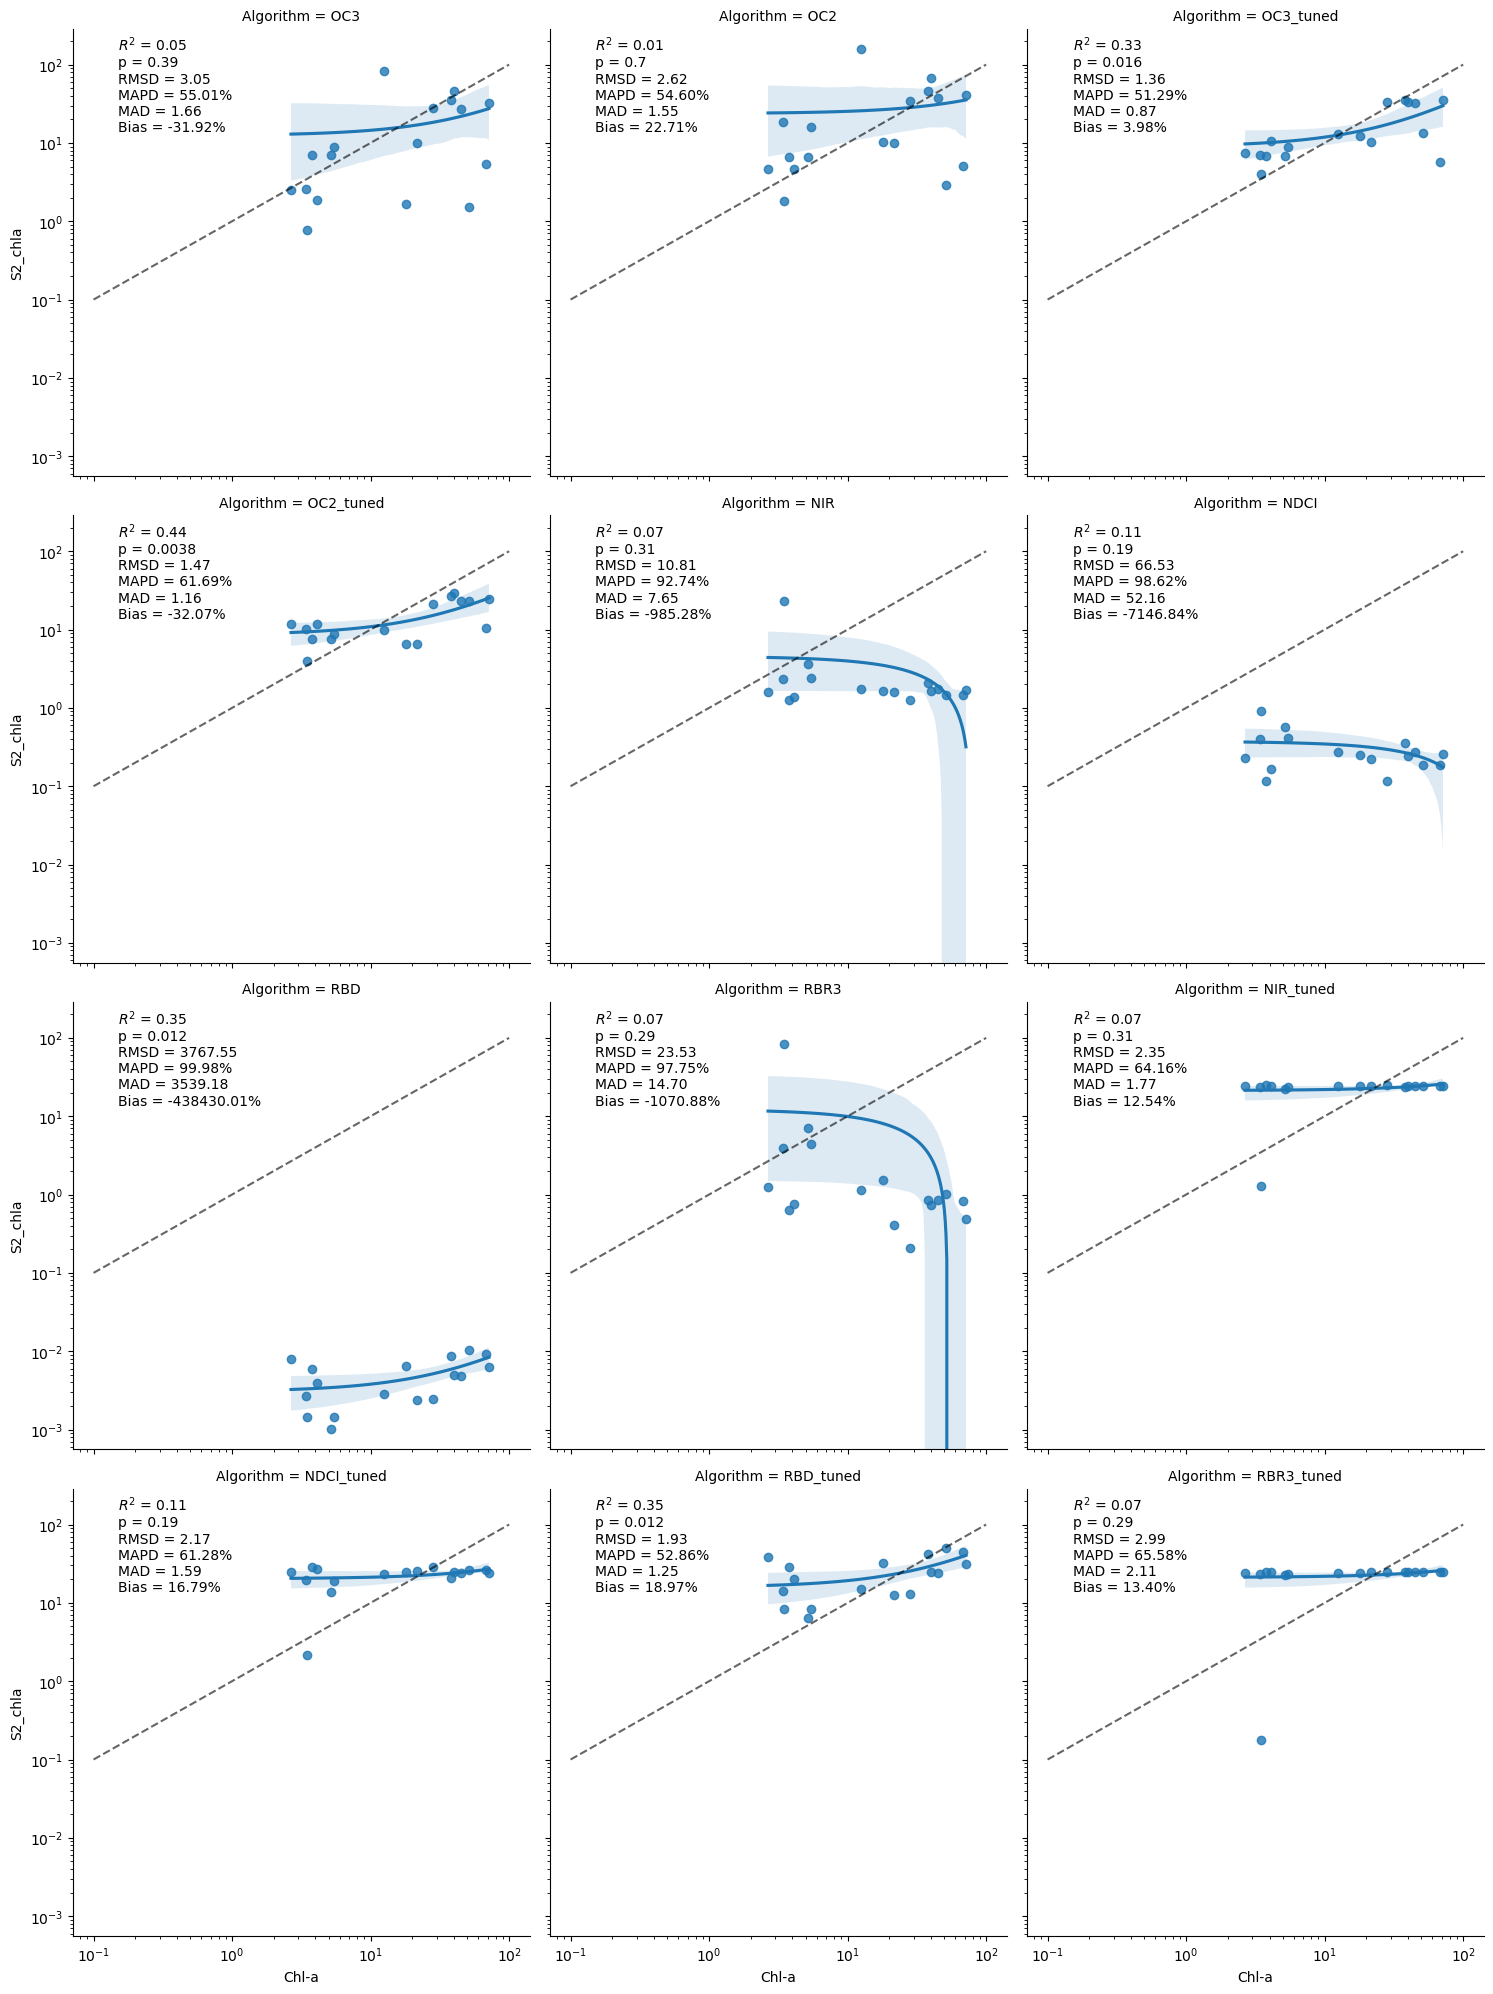

In [171]:
def annotate(data, x='Chl-a', y='sdfkjdf', order=1, plot=True, lims=None, **kws):
    res = sp.stats.linregress(data.dropna()[x]**order, data.dropna()[y])
    mae = MAE(data.dropna()[x], data.dropna()[y])
    mape = MAPE(data.dropna()[x], data.dropna()[y])
    rmsd = RMSD(data.dropna()[x], data.dropna()[y])
    bias = SSPB(data.dropna()[x], data.dropna()[y])
    mad = MAD(data.dropna()[x], data.dropna()[y])
    mapd = MAPD(data.dropna()[x], data.dropna()[y])
    ax = plt.gca()
    ax.text(0.1, 0.77, '$R^2$ = {:.2f} \np = {:.2g}\
                       \nRMSD = {:.2f} \nMAPD = {:.2f}%\
                       \nMAD = {:.2f} \nBias = {:.2f}%'.format(res.rvalue**2,
                                                              res.pvalue,
                                                              rmsd, mapd,
                                                              mad, bias),
            transform=ax.transAxes)

    if plot:
        ax.plot([0.1, 100], [0.1, 100], 'k--', alpha=0.6)

g = sns.lmplot(data=insit_melt[insit_melt.s2_date_diff <= '3 days'],
               x='Chl-a', y='S2_chla', col='Algorithm', col_wrap=3,
               facet_kws={'sharey':True, 'sharex':True})
#sns.scatterplot(data=insit_reduced, x='Chl-a', y=alg, hue='insitu_date_diff', legend=True)
g.map_dataframe(annotate, y='S2_chla', plot=True)# lims=[0.1, 100])

lims=[[0.1, 100], [0.1, 100], [0.1, 100],
      [.1, 100], [.1, 100], [.1, 100],
      [0.1, 100], [0.1, 100]]

for ax, lim in zip(g.axes, lims):
#     ax.set_xlim(lim[0], lim[1])
#     ax.set_ylim(lim[0], lim[1])
    ax.set_yscale('log')
    ax.set_xscale('log')
plt.show()